In [238]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import HTML
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

sns.set()

<img src="https://cdn-images-1.medium.com/max/800/1*Y2KPVGrVX9MQkeI8Yjy59Q.gif">

## Let's start with Exponentially Weighted Averages

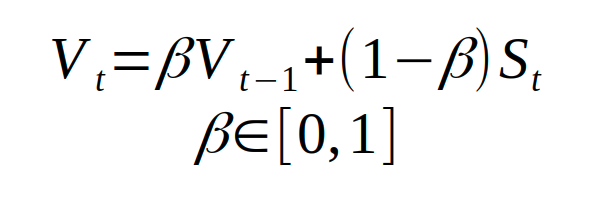

#### Generate dataset

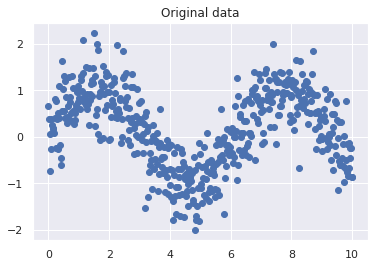

In [41]:
np.random.seed(10)
x = np.linspace(0,10,500)
S = np.sin(x) + np.random.normal(0,0.5,500)
plt.scatter(x,S)
plt.title("Original data");

#### Transforme dataset 

In [38]:
def EWA_transform(S,betta):
    """
    EWA transforme
    """
    V = [0]
    for i in range(1,len(S)):
        V.append((betta*V[-1] + (1-betta)*S[i]))
    return V


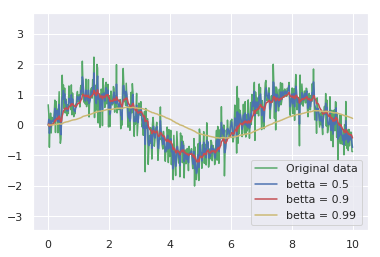

In [42]:
V_1 = EWA_transform(S,0.5)
V_2 = EWA_transform(S,0.9)
V_3 = EWA_transform(S,0.99)
fig, ax = plt.subplots()
ax.plot(x, S, '-g', label='Original data')
ax.plot(x, V_1, '-b', label='betta = 0.5')
ax.plot(x, V_2, 'r', label='betta = 0.9')
ax.plot(x, V_3, '-y', label='betta = 0.99')
ax.axis('equal')
leg = ax.legend();

### Select function for optimization

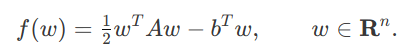

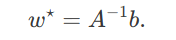

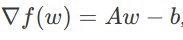

In [546]:
A = np.array([[1,0],[0,1]])
b = np.array([4,8]).reshape(2,1)

def cost(w,A,b):
    return np.asscalar(1/2*np.dot(np.dot(w.T,A),w) - np.dot(b.T,w)) 

def cost_grad(w,A,b):
    return (np.dot(A,w) - b)

In [547]:
w_0 = np.dot(np.linalg.inv(A),b)
print(w_0)

[[4.]
 [8.]]


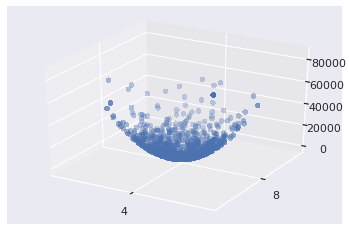

In [548]:
X = np.random.randn(1000,2)*100
Z = np.array([cost(x.reshape(2,1),A,b) for x in X]).reshape(-1,1)
Z_grad = np.array([cost_grad(x.reshape(2,1),A,b) for x in X]).reshape(-1,1)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(X[:,0], X[:,1], Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xticks(w_0[0])
ax.set_yticks(w_0[1]);

### Gradient Descent 

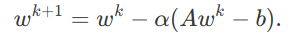

In [565]:
class Gradient_Descent():
    def __init__(self,cost,cost_grad,lr,epochs,w_0,params):
        self.cost = kwargs["cost"]
        self.cost_grad = kwargs["cost_grad"]
        self.lr = kwargs["lr"]
        self.epochs = kwargs["epochs"]
        self.A = kwargs["A"]
        self.b = kwargs["b"]
        self.w_0 = kwargs["w_0"]
        self.history = []
    
    def optimize(self,X):
        w = np.zeros((2,1))
        converg = False
        for i in range(self.epochs):
            if not converg:
                for j in range(X.shape[0]):
                    grad = self.cost_grad(X[j].reshape(2,1),self.A,self.b)
                    w -= self.lr*grad
                    self.history.append(cost(w,self.A,self.b))
                    if np.linalg.norm(w-self.w_0)<1:
                        converg = True
                        print("converge in {0} steps".format(len(self.history)))
                        break
            else:
                break
        return w

In [563]:
def plot_results(optimizer,X,w_0,**params):
    opt = optimizer(**params)
    w_min = opt.optimize(X)
    print("Real min point:",w_0.reshape(1,2))
    print("Estimated min point:",w_min.reshape(1,2))
    print("Distance:",np.linalg.norm(w_min-w_0))
    steps = np.linspace(0,len(opt.history),len(opt.history))
    plt.plot(steps,opt.history)
    plt.title("History")
    plt.xlabel("Steps")
    plt.ylabel("Cost")
    plt.show();

In [ ]:
params = {"A":A,
          "b":b,
         }
plot_results(Gradient_Descent,X,w_0)

In [550]:
params = {"A":A,
          "b":b,
         }

GD = Gradient_Descent(cost=cost,cost_grad=cost_grad,lr=0.005,epochs=10,w_0=w_0,params=params)
X = np.random.randn(45,2)*2
w_min = GD.optimize(X)
print("Real min point:",w_0.reshape(1,2))
print("Estimated min point:",w_min.reshape(1,2))
print("Distance:",np.linalg.norm(w_min-w_0))

converge in 188 steps
Real min point: [[4. 8.]]
Estimated min point: [[3.48589304 7.19539013]]
Distance: 0.9548314085346161


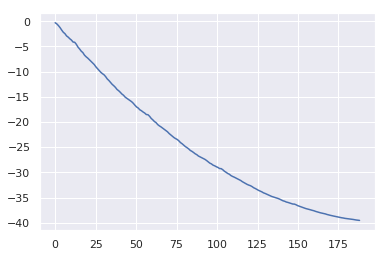

In [551]:
steps = np.linspace(0,len(GD.history),len(GD.history))
plt.plot(steps,GD.history);

## SGD with momentum

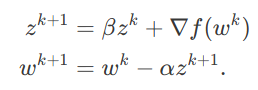

In [552]:
class SGD_momentum():
    def __init__(self,cost,cost_grad,lr,betta,epochs,w_0,params):
        self.cost = cost
        self.cost_grad = cost_grad
        self.lr = lr
        self.betta = betta
        self.epochs = epochs
        self.params = params
        self.w_0 = w_0
        self.history = []
        
    def optimize(self,X):
        w = np.zeros((2,1))
        z = np.zeros((2,1))
        converg = False
        for i in range(self.epochs):
            if not converg:
                for j in range(X.shape[0]):
                    grad = self.cost_grad(X[j].reshape(2,1),**self.params)
                    z = self.betta*z + (1-self.betta)*grad
                    w -= self.lr*z
                    self.history.append(cost(w,**self.params))
                    if np.linalg.norm(w-self.w_0)<1:
                        converg = True
                        print("converge in {0} steps".format(len(self.history)))
                        break
            else:
                break
        return w

In [559]:
params = {"A":A,
          "b":b,
         }

sgd_momentum = SGD_momentum(cost=cost,cost_grad=cost_grad,lr=0.2,betta=0.9,epochs=10,w_0=w_0,params=params)
X = np.random.randn(50,2)*2
w_min = sgd_momentum.optimize(X)
print("Real min point:",w_0.reshape(1,2))
print("Estimated min point:",w_min.reshape(1,2))
print("Distance:",np.linalg.norm(w_min-w_0))

converge in 10 steps
Real min point: [[4. 8.]]
Estimated min point: [[3.3268721  7.39815589]]
Distance: 0.902949335199271


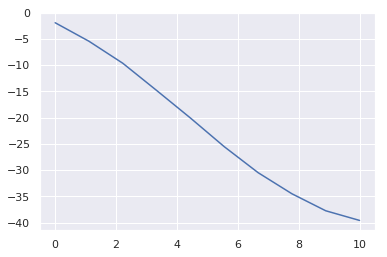

In [560]:
steps = np.linspace(0,len(sgd_momentum.history),len(sgd_momentum.history))
plt.plot(steps,sgd_momentum.history);